<h1>The Sparks Foundation </h1>

<h2>Name-Dhruv Kothari</h2>


 Data Science and Bussiness analyst


<h2>Task-2  :Prediction using UnSupervised ML</h2>

<h3>Importing libraries </h3>

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<h3> Reading the data file</h3>

In [122]:
data=pd.read_csv('Iris.csv')

<h3> Visulazing the dataset </h3>

In [123]:
data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [124]:
data.shape

(150, 5)

In [125]:
#checking if there is any null value
data.isnull().sum()


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [126]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<h3>Classifying the unique labels in Species table in the dataset</h3>

In [128]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<h3>Using Label Encoder to assign categorical value to label Dataset </h3>

In [129]:
from sklearn.preprocessing import LabelEncoder
labels=LabelEncoder()
data['Species']=labels.fit_transform(data['Species'])
data['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

<h3>Plotting the graph of the dataset suing seaborn library </h3>

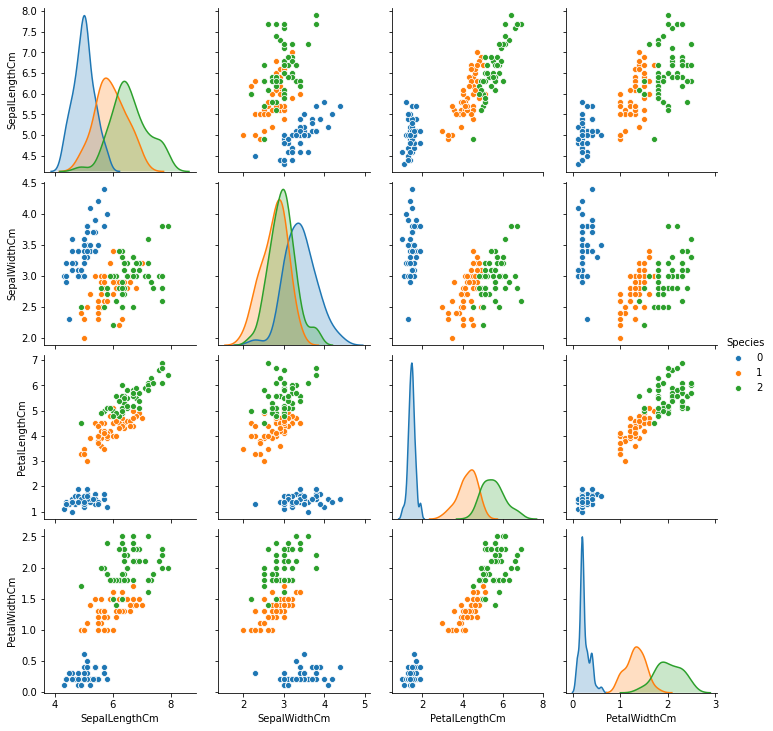

In [130]:
import seaborn as sn
sn.pairplot(data,vars=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"],hue="Species")
plt.show()

# Elbow method using within cluster sum of errors (wcss)

In [131]:
data=data.iloc[:,[0,1,2,3]].values

In [132]:
from sklearn.cluster import KMeans
 
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
wcss

#inertia is used to find the wcss

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 38.930963049671746,
 34.31875322061191,
 29.95408642103723,
 27.992635739389623,
 25.94725937001596]

# Now plotting graph of elbow to find the number of clusters

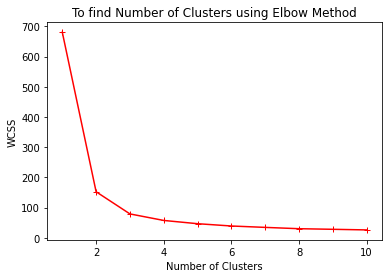

In [133]:
plt.plot(range(1,11),wcss,marker='+',color='red')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.title('To find Number of Clusters using Elbow Method')
plt.show()

# We can see that here at values after 3 the graph becomes linear .So cluster should be =3

In [134]:
kmeans=KMeans(init='k-means++',n_clusters=3,n_init=10,max_iter=100,random_state=0)
y_means=kmeans.fit_predict(data)
y_means

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [135]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

# Now we have to visualize the Clusters

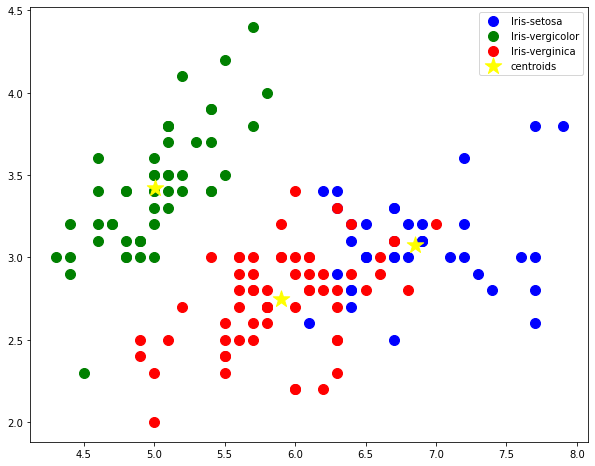

In [136]:
fig=plt.figure(figsize=(10,8))

plt.scatter(data[y_means == 0, 0],data[y_means== 0,1] ,s=100,c='blue',label='Iris-setosa')
plt.scatter(data[y_means == 1,0],data[y_means== 1,1] ,s=100,c='green',label='Iris-vergicolor')
plt.scatter(data[y_means == 2,0],data[y_means== 2, 1] ,s=100,c='red',label='Iris-verginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',marker='*',label='centroids')


plt.legend()

<h3>Thank You </h3>